# PH6130 Project

# Principal Component Analysis on a dataset containing chemical analysis of wines
Saurav S Sankhe (ET21MTECH11003), Rahul Ghuge (ET21MTECH11002)

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the Dataset
dataset = pd.read_csv('Wine.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
dataset.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


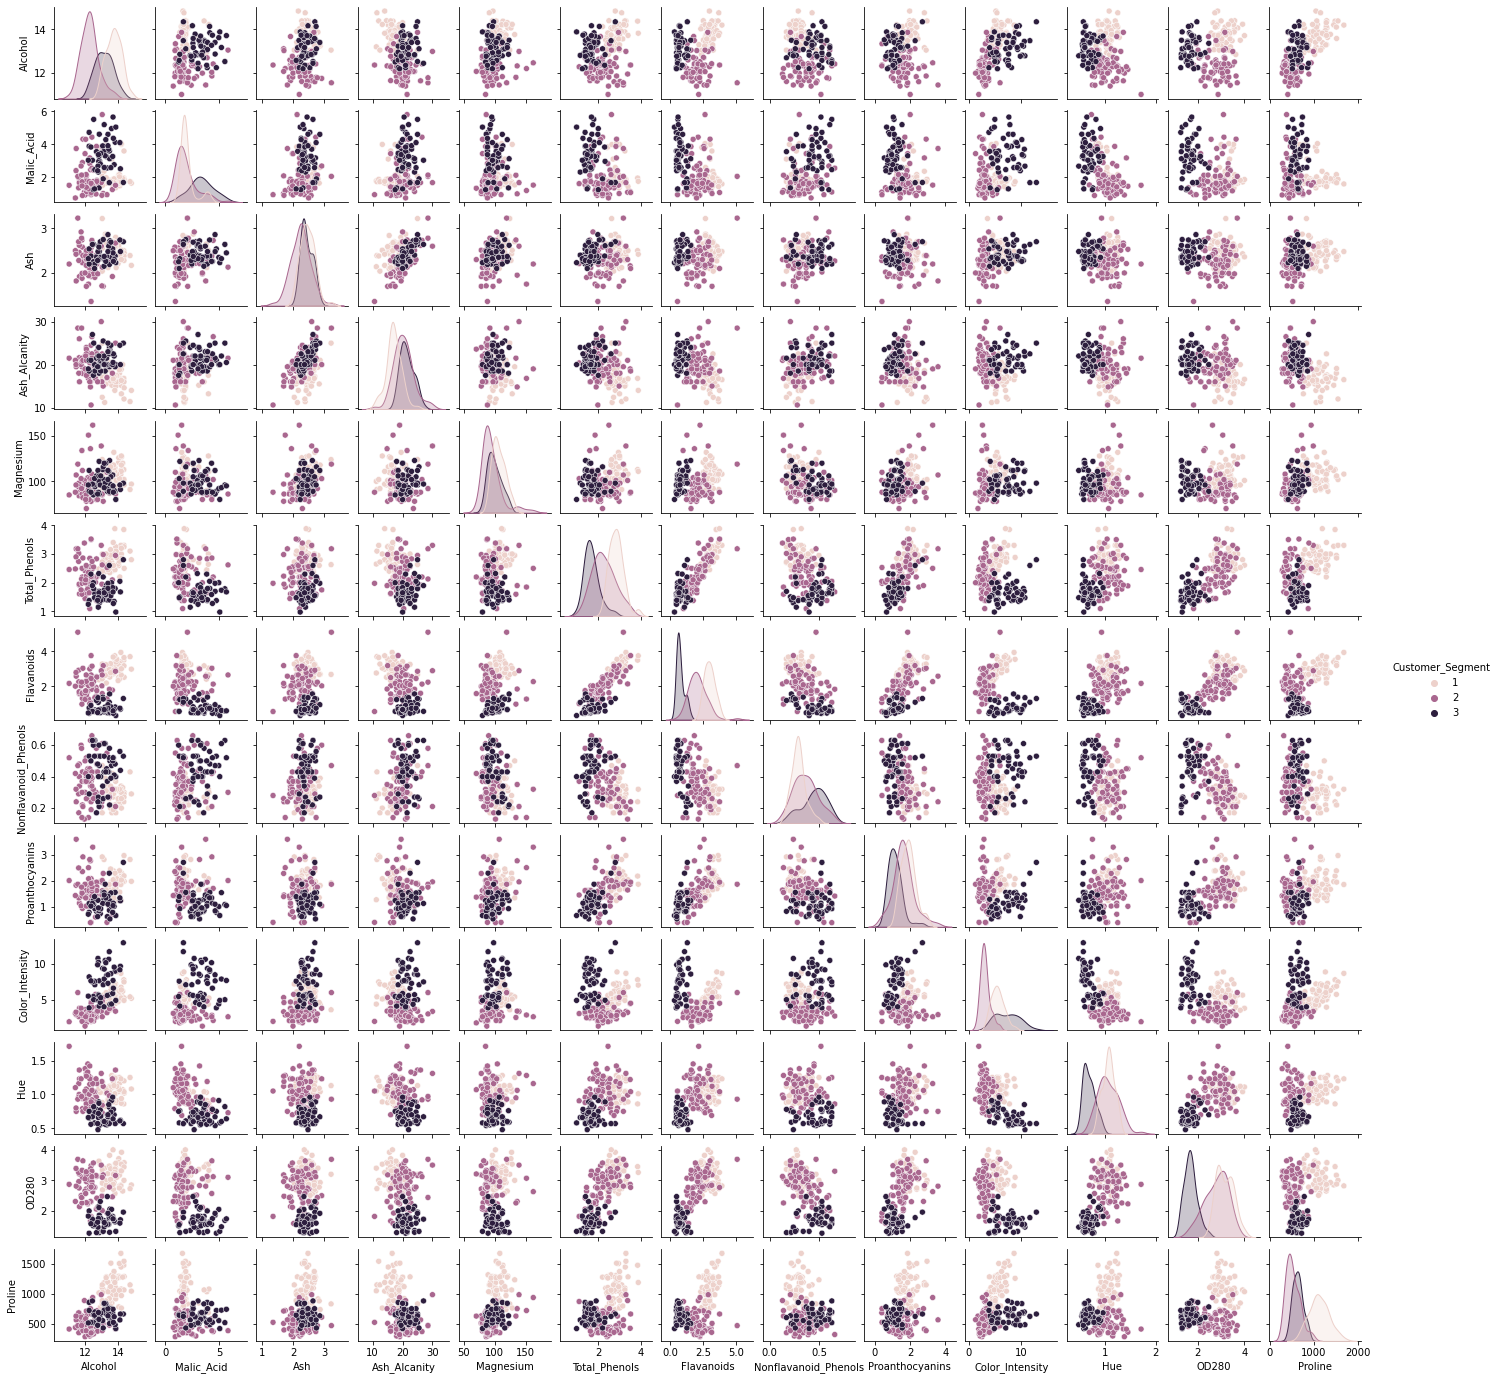

In [4]:
# =============================================================================
# PCA without Sklearn
# =============================================================================
sns.pairplot(dataset, hue = 'Customer_Segment',height=1.5 )
plt.savefig('Pairwise plot')

In [5]:
# Seperating the Customer_Segment column
Customer_Segment = dataset["Customer_Segment"].tolist()
X = dataset.drop("Customer_Segment", axis = 1)

In [6]:
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)

In [7]:
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)

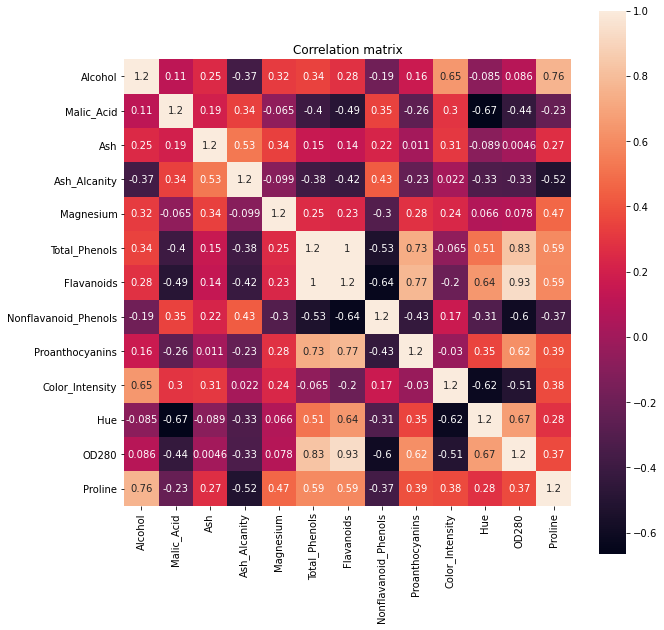

In [8]:
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')
plt.savefig('correlation_figure')

In [9]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([5.58427563, 2.9630755 , 1.7160054 , 1.09051572, 1.01249744,
        0.76143301, 0.65388693, 0.4135502 , 0.3428042 , 0.29773761,
        0.26793585, 0.20027401, 0.12267515]),
 array([[-0.1443294 , -0.48365155,  0.20738262, -0.0178563 , -0.26566365,
          0.21353865, -0.05639636,  0.39613926, -0.50861912,  0.21160473,
          0.22591696, -0.26628645,  0.01496997],
        [ 0.24518758, -0.22493093, -0.08901289,  0.53689028,  0.03521363,
          0.53681385,  0.42052391,  0.06582674,  0.07528304, -0.30907994,
         -0.07648554,  0.12169604,  0.02596375],
        [ 0.00205106, -0.31606881, -0.6262239 , -0.21417556, -0.14302547,
          0.15447466, -0.14917061, -0.17026002,  0.30769445, -0.02712539,
          0.49869142, -0.04962237, -0.14121803],
        [ 0.23932041,  0.0105905 , -0.61208035,  0.06085941,  0.06610294,
         -0.10082451, -0.28696914,  0.42797018, -0.20044931,  0.05279942,
         -0.47931378, -0.05574287,  0.09168285],
        [-0.14199204, -0.29963

In [10]:
# method2
np.linalg.eig(X_corr)

(array([5.58427563, 2.9630755 , 1.7160054 , 1.09051572, 1.01249744,
        0.76143301, 0.65388693, 0.12267515, 0.4135502 , 0.20027401,
        0.3428042 , 0.26793585, 0.29773761]),
 array([[-0.1443294 ,  0.48365155,  0.20738262, -0.0178563 , -0.26566365,
          0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
         -0.50861912, -0.22591696,  0.21160473],
        [ 0.24518758,  0.22493093, -0.08901289,  0.53689028,  0.03521363,
          0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
          0.07528304,  0.07648554, -0.30907994],
        [ 0.00205106,  0.31606881, -0.6262239 , -0.21417556, -0.14302547,
          0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
          0.30769445, -0.49869142, -0.02712539],
        [ 0.23932041, -0.0105905 , -0.61208035,  0.06085941,  0.06610294,
         -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
         -0.20044931,  0.47931378,  0.05279942],
        [-0.14199204,  0.29963

In [11]:
np.sum(eig_values)

15.426666666666677

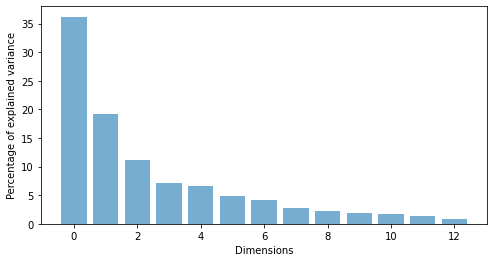

In [12]:
# plotting the variance explained by each PC 
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(13), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')
plt.savefig('No of Dimensions')

In [13]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

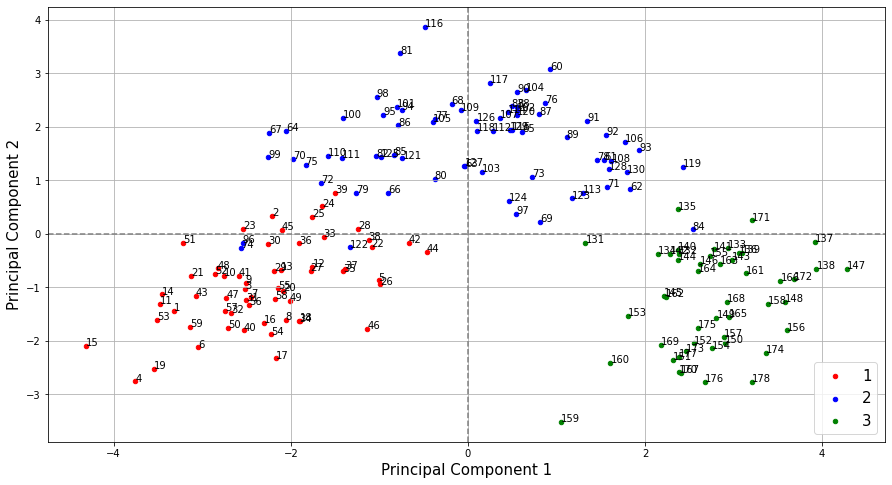

<Figure size 432x288 with 0 Axes>

In [14]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    species_unique = list(set(Customer_Segment))
    species_colors = ["r","b","g"]
    
    for i, spec in enumerate(Customer_Segment):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    
    plt.grid()
    # plt.axis([-4, 4, -3, 3])
    plt.show()
    
plot_scatter(pc1, pc2)
plt.savefig('Scatter plot_without sklearn')

In [15]:
def plot_correlation_circle(pc1, pc2):    
    fig, ax = plt.subplots(figsize=(16, 10))

    for i in range(X.shape[1]):
        x = np.corrcoef(pc1,X[X.columns[i]])[0,1]
        y = np.corrcoef(pc2,X[X.columns[i]])[0,1]
        ax.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
        ax.annotate(X.columns[i], (x+0.02,y+0.02), size=12)


    ax.set_title('Correlation circle')
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show()
    plt.savefig('Correlation circle')

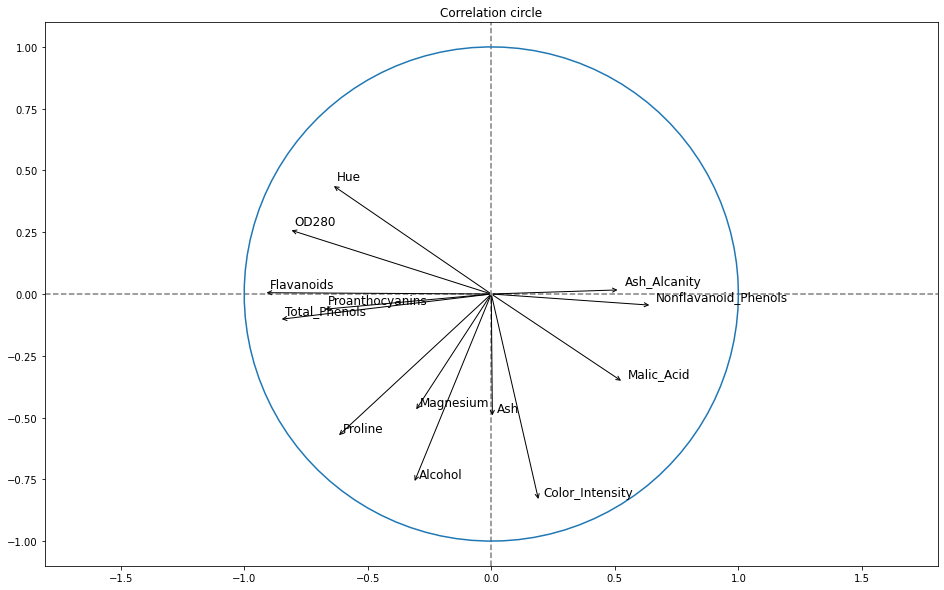

<Figure size 432x288 with 0 Axes>

In [16]:
plot_correlation_circle(pc1,pc2)

# 
Well it seems that:Flavanoids & Ash Alcanity are the main things that characterizes the data

# PCA with sklearn

In [17]:
# =============================================================================
# PCA with sklearn
# =============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
X = dataset.drop("Customer_Segment", axis = 1)
X = StandardScaler().fit_transform(X)
pca = PCA()

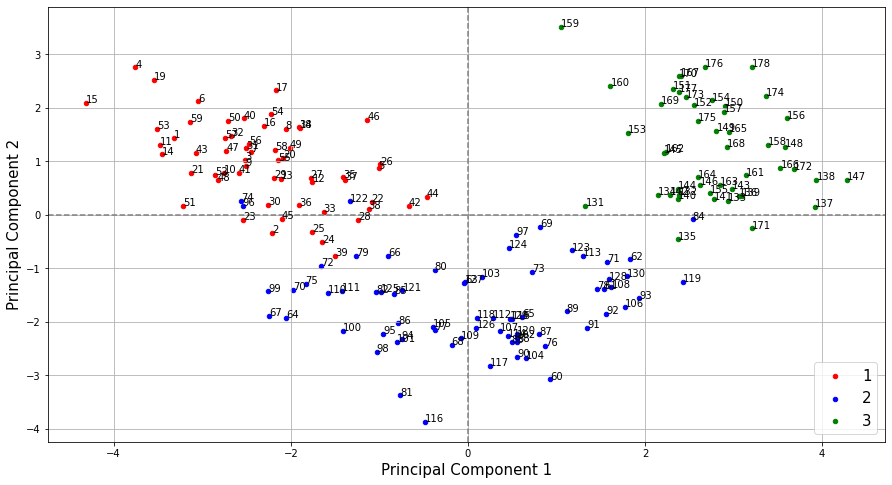

<Figure size 432x288 with 0 Axes>

In [19]:
result = pca.fit_transform(X)
# Remember what we said about the sign of eigen vectors that might change ?
pc1 = - result[:,0]
pc2 = - result[:,1]
plot_scatter(pc1, pc2)
plt.savefig('Scatter plot_with sklearn')